Investigate a Dataset
==

Python notebook with report and code used for exploring and investigating Titanic dataset.


Author: *Marcin Zadroga*

Was analyzed and developed during infoShare Academy workshop

`Example of data analysis in Python`

# 1. Description of dataset and data cleaning


In this project the Titanic dataset was investigated. The analysis was conducted on dataset from Kaggle website. The data contains information about 891 of the total number 2224 passengers and crew on board the Titanic. Each row describes one passenger, and contains variables:
- PassengerId - numeric value; id
- Survived - numeric value; 0 (died) or 1 (survived)
- Pclass - numeric value; 1, 2 or 3 - denotes 1st, 2nd or 3rd class
- Name - text
- Sex  - text; ‘male’ or ‘female’
- Age - numeric value
- SibSp - numeric value; number of siblings/spouses aboard
- Parch - numeric value; number of parents/children aboard
- Ticket - text; ticket number - contains both letters and numbers
- Fare - numeric value
- Cabin  - text
- Embarked - text, port of embarkation (C, Q or S)


#### Loading needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#reading CSV into DataFrame
url = "https://www.mlgdansk.pl/wp-content/uploads/2019/05/titanic_data.csv"

titanic_df = pd.read_csv(url)

#changing column names to be written in uppercase (just for convenience)
titanic_df.columns = map(str.upper, titanic_df.columns)

#### Checking types of variables in DataFrame

In [3]:
titanic_df.dtypes

PASSENGERID      int64
SURVIVED         int64
PCLASS           int64
NAME            object
SEX             object
AGE            float64
SIBSP            int64
PARCH            int64
TICKET          object
FARE           float64
CABIN           object
EMBARKED        object
dtype: object

It was noticed that some values are missing (NaN values in DataFrame). Those were filled with means (for columns of numeric type) or left empty (for columns of other types). 

Other changes made to DataFrame with Titanic data are: 
- putting all names of columns into uppercase (just for convenient usage of them)
- converting values in SURVIVED column into Boolean type. 


#### Preview of the DataFrame
_NaN values are visible._

In [4]:
titanic_df.iloc[:, [0,1,4,5,6,10]].head(8)

,PASSENGERID,SURVIVED,SEX,AGE,SIBSP,CABIN
0,1,0,male,22.0,1,NaN
1,2,1,female,38.0,1,C85
2,3,1,female,26.0,0,NaN
3,4,1,female,35.0,1,C123
4,5,0,male,35.0,0,NaN
5,6,0,male,NaN,0,NaN
6,7,0,male,54.0,0,E46
7,8,0,male,2.0,3,NaN


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  891 non-null    int64  
 1   SURVIVED     891 non-null    int64  
 2   PCLASS       891 non-null    int64  
 3   NAME         891 non-null    object 
 4   SEX          891 non-null    object 
 5   AGE          714 non-null    float64
 6   SIBSP        891 non-null    int64  
 7   PARCH        891 non-null    int64  
 8   TICKET       891 non-null    object 
 9   FARE         891 non-null    float64
 10  CABIN        204 non-null    object 
 11  EMBARKED     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Massaging
_Getting rid of NaN values_

Functions checks for NaN values in each column. If NaNs are found, name of column and count of NaNs is printed. 
NaN values are filled with means of current column (for numeric types) or left empy fields (for other types)

In [6]:
def fill_nans(column):
    nans = column[column.isnull()]
    nans_no = len(nans)
    if nans_no > 0:
        print(column.name, nans_no)
        if column.dtype == 'int64' or column.dtype == 'float64': #for numeric type fill NaNs with mean of the column
            column = column.fillna(column.mean())
            #column = column.fillna(0)
        else: #for other type of NaNs, leave field empy
            column = column.fillna('')
    return column
    
titanic_df = titanic_df.apply(fill_nans)

AGE 177
CABIN 687
EMBARKED 2


#### Converting values to more convenient type
For convenience, type of values in SURVIVED column is changed to Boolean. 

In [7]:
titanic_df['SURVIVED'] = titanic_df['SURVIVED'].astype(bool) # changing type to BOOL

titanic_df.iloc[1:6]

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,,S
5,6,False,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,,Q


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  891 non-null    int64  
 1   SURVIVED     891 non-null    bool   
 2   PCLASS       891 non-null    int64  
 3   NAME         891 non-null    object 
 4   SEX          891 non-null    object 
 5   AGE          891 non-null    float64
 6   SIBSP        891 non-null    int64  
 7   PARCH        891 non-null    int64  
 8   TICKET       891 non-null    object 
 9   FARE         891 non-null    float64
 10  CABIN        891 non-null    object 
 11  EMBARKED     891 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


#### Factorizing categorical variables
SEX, PCLASS, EMBARKED variables are factorized.
Then, to DataFrame additional columns like IS_SEX_MALE, IS_SEX_FEMALES, IS_PCLASS_1 etc. are added. It will be handy to have values in such form for calculatin correlations.

In [9]:
for colname in ['SEX','PCLASS','EMBARKED']:
    column = titanic_df[colname] 
    labels, uniques = pd.factorize(column) #changing attribute into factor
    for i, category in enumerate(uniques):
        try:
            category = category.upper()
        except:
            pass
    
        newcolname= "IS_{}_{}".format(colname, category)
        titanic_df[newcolname] = labels == i

In [10]:
titanic_df.dtypes

PASSENGERID        int64
SURVIVED            bool
PCLASS             int64
NAME              object
SEX               object
AGE              float64
SIBSP              int64
PARCH              int64
TICKET            object
FARE             float64
CABIN             object
EMBARKED          object
IS_SEX_MALE         bool
IS_SEX_FEMALE       bool
IS_PCLASS_3         bool
IS_PCLASS_1         bool
IS_PCLASS_2         bool
IS_EMBARKED_S       bool
IS_EMBARKED_C       bool
IS_EMBARKED_Q       bool
IS_EMBARKED_        bool
dtype: object

# 2. Exploring dataset

#### Learning about from its description (means, counts) 

From Table below, we see that 64.75% of passengers were men, while only 35.25% were women. Average age of passengers was 29.5 years and majority of passengers traveled alone (SIBSP and PARCH equal 0 for 50%). 

In [11]:
describe_df = titanic_df.describe(include='all')
#describe_df.columns

describe_df[['AGE','SIBSP','PARCH','FARE']]

,AGE,SIBSP,PARCH,FARE
count,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000


In [12]:
titanic_df[['IS_SEX_MALE','IS_SEX_FEMALE']].sum()/len(titanic_df)

IS_SEX_MALE      0.647587
IS_SEX_FEMALE    0.352413
dtype: float64

From Table below, one can learn about the social status of passenger. PCLASS variable could be treated as proxy for socio-economic status. 24.2% passengers were traveling in 1st class, 20.7% traveled in 2nd class and 55.1% traveled in 3rd class.

In [13]:
titanic_df[['PCLASS','IS_PCLASS_1','IS_PCLASS_2','IS_PCLASS_3']].sum()

PCLASS         2057
IS_PCLASS_1     216
IS_PCLASS_2     184
IS_PCLASS_3     491
dtype: int64

From next Table, we learn that vast majority of passengers (described in dataset) - 72.3% embarked in Southampton (S), 18.9% in Cherbourg and 8.6% in Queenstown. We do not have embarkation information for 0.2% of passengers (there were only 2 such rows).


In [14]:
describe_df[['IS_EMBARKED_S','IS_EMBARKED_C','IS_EMBARKED_Q','IS_EMBARKED_']]

,IS_EMBARKED_S,IS_EMBARKED_C,IS_EMBARKED_Q,IS_EMBARKED_
count,891,891,891,891
unique,2,2,2,2
top,True,False,False,False
freq,644,723,814,889
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


#### Number of survived vs. overall number of passengers

It is needed to look how many people are described as survived. The values are presented in Table below. We can learn, that mean chance of surviving (based on our datatest) was about 38% (in reality, only 32% passengers survived the Titanic disaster[1]).



In [15]:
pax_overall = len(titanic_df)
pax_survived = titanic_df['SURVIVED'].sum()

info_df = pd.DataFrame(
        data = {
        'number of survivors' : [pax_survived],
        'chance of surviving' : [pax_survived/float(pax_overall)],
        'number of passengers' : [pax_overall]
    })

info_df

,number of survivors,chance of surviving,number of passengers
0,342,0.383838,891


Creating additional DataFrames for storing information about males and females separatedly

In [16]:
pax_sex_groupby = titanic_df.groupby('SEX')
survived_groupby = titanic_df.groupby('SURVIVED')

males_df = pax_sex_groupby.get_group('male')
females_df = pax_sex_groupby.get_group('female')

survived_df = survived_groupby.get_group(True)
died_df = survived_groupby.get_group(False)

males_survived_groupby = males_df.groupby('SURVIVED')
females_survived_groupby = females_df.groupby('SURVIVED')

males_survived_df = males_survived_groupby.get_group(True)
males_died_df = males_survived_groupby.get_group(False)
females_survived_df = females_survived_groupby.get_group(True)
females_died_df = females_survived_groupby.get_group(False)

no_males = len(males_df)
no_females = len(females_df)
no_males_survived = len(males_survived_df)
no_females_survived = len(females_survived_df)

#### Getting more intuition about the dataset


The plot below presents the age distribution by survival. Those who tragically died in Titanic disaster seemed to be older.

In [17]:
survived_ages = list(survived_df['AGE'])
died_ages = list(died_df['AGE'])

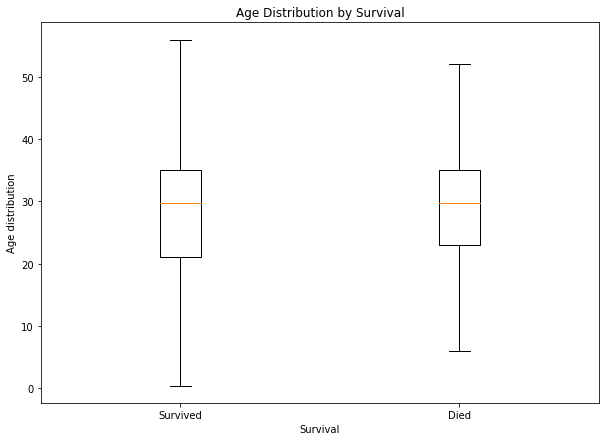

In [18]:
plt.figure(figsize=(10, 7))
plt.boxplot([survived_ages, died_ages], 0, '') #do not show outliers
plt.title('Age Distribution by Survival')
plt.xticks([1, 2], ['Survived', 'Died'])
plt.ylabel("Age distribution")
plt.xlabel("Survival")
plt;

Below Plot shows distribution of passengers' age taking into account passengers' class. It's visible that on given datasets, 1st class passengers were the oldest ones.

In [19]:
pclass1_ages = pd.Series(titanic_df[titanic_df['IS_PCLASS_1']==True]['AGE'])
pclass2_ages = pd.Series(titanic_df[titanic_df['IS_PCLASS_2']==True]['AGE'])
pclass3_ages = pd.Series(titanic_df[titanic_df['IS_PCLASS_3']==True]['AGE'])

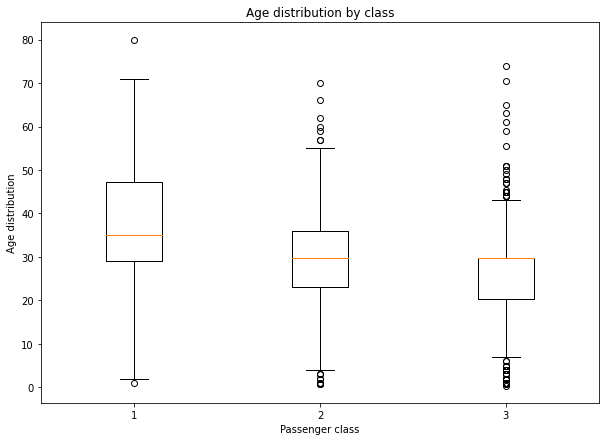

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Age distribution by class")
plt.ylabel("Age distribution")
plt.xlabel("Passenger class")
plt.boxplot([pclass1_ages, pclass2_ages, pclass3_ages],0) #plot without outliers
plt;

It's also interesting to check relation of fare in context of booking/tickets' class. It is presented on below plot. The 1st class tickets were of course the most expensive, and the fare for 1st had the biggest variety. The 3rd class fare is the cheapest and has the most condensed values.

In [21]:
pclass1_fares = pd.Series(titanic_df[titanic_df['IS_PCLASS_1']==True]['FARE'])
pclass2_fares = pd.Series(titanic_df[titanic_df['IS_PCLASS_2']==True]['FARE'])
pclass3_fares = pd.Series(titanic_df[titanic_df['IS_PCLASS_3']==True]['FARE'])

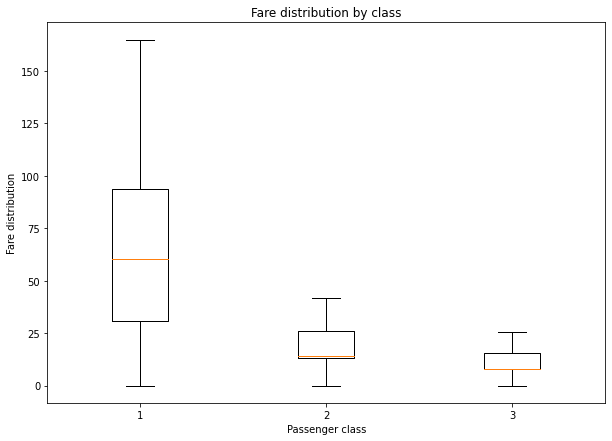

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Fare distribution by class")
plt.ylabel("Fare distribution")
plt.xlabel("Passenger class")
plt.boxplot([pclass1_fares, pclass2_fares, pclass3_fares], 0, '') #plot without outliers
plt;

What is interesting, is that, for some ticket numbers, there were several records with one ticket number.

In [23]:
titanic_df.TICKET.value_counts().head()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
Name: TICKET, dtype: int64

In [24]:
tickets_groupby = titanic_df.groupby('TICKET')
tickets_groupby.get_group(list(tickets_groupby.groups.keys())[0])[['TICKET','PASSENGERID','SURVIVED','PCLASS','NAME','SEX','SIBSP']]


,TICKET,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,SIBSP
257,110152,258,True,1,"Cherry, Miss. Gladys",female,0
504,110152,505,True,1,"Maioni, Miss. Roberta",female,0
759,110152,760,True,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,0


Below plot, take into consideration 'multiple passengers on ticket' situation. Additionally, the fare valus of 0, were excluded for purposes of creating plot.

Still, we can see, that 1st class tickets were the most expensive, though we see much smaller variability of 'fare per passenger' for 2nd and 3rd class.

In [25]:
pclass1_fares_per_passenger = []
pclass2_fares_per_passenger = []
pclass3_fares_per_passenger = []

fare_class_infos = pd.DataFrame()

for i, group in enumerate(tickets_groupby.groups):
    fare_class_info = tickets_groupby.get_group(group)[['FARE','PCLASS','AGE']]
    no_passengers_on_ticket = len(fare_class_info)
    fare = fare_class_info['FARE'].iloc[0] # take first value from the group
    fare_per_passenger = 0.0
    pclass = fare_class_info['PCLASS'].iloc[0]
    if fare == 0.0: # exclude 0.0 fare from analysis, probably those are equivalents of NaN values for FARE column
        continue
    else:
        fare_per_passenger = fare/no_passengers_on_ticket

    if pclass == 1:
        pclass1_fares_per_passenger.append(fare_per_passenger)
    elif pclass == 2:
        pclass2_fares_per_passenger.append(fare_per_passenger)
    elif pclass == 3:
        pclass3_fares_per_passenger.append(fare_per_passenger)    
    
    info = pd.DataFrame(index = [i],  
                        data = {'AGE' : fare_class_info['AGE'].iloc[0],'FARE' : fare_per_passenger,'PCLASS' : pclass})
    fare_class_infos = fare_class_infos.append(info)


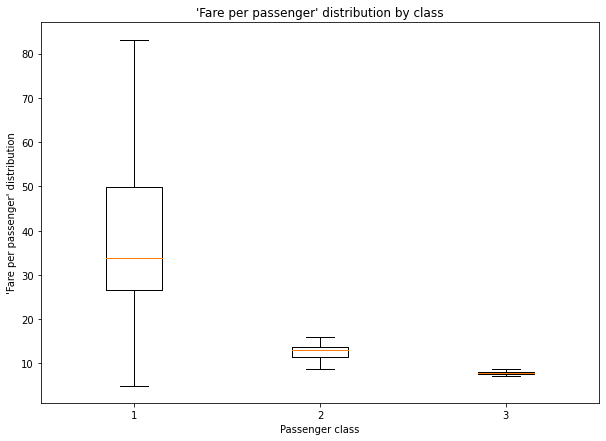

In [26]:
plt.figure(figsize=(10, 7))
plt.title("'Fare per passenger' distribution by class")
plt.ylabel("'Fare per passenger' distribution"); plt.xlabel("Passenger class");
plt.boxplot([pclass1_fares_per_passenger, pclass2_fares_per_passenger, pclass3_fares_per_passenger], 0, ''); #plot without outliers

Next plot, presents age distribution by 'fer per passenger'.

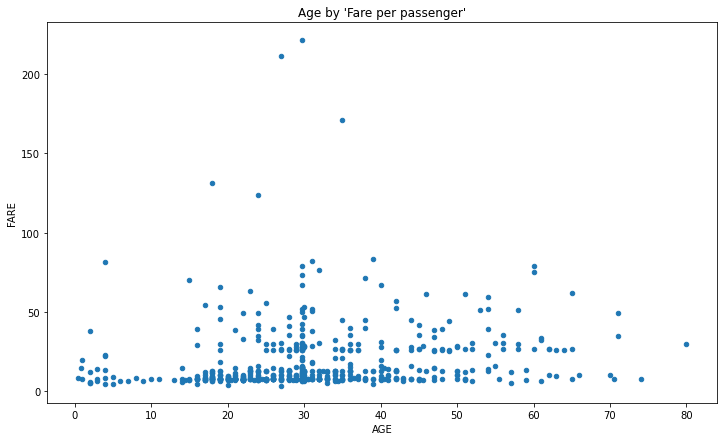

In [27]:
fare_class_infos.plot('AGE', 'FARE',
                      kind = 'scatter', 
                      colorbar = False, 
                      title = "Age by 'Fare per passenger'", figsize=(12,7));

#### Finding correlations between SURVIVED column and other variables

To be able to state proper questions for further investigation, it was decided to look at first at the correlations between variables describing passengers. Plot below shows the correlations (x axis) between event of surviving and other variables (y axis).


One can observe, that surviving is mostly corelated with:
- SEX (positive for females, negative for males)
- PCLASS (positive for classes 1st and 2nd, negative for 3rd)
- FARE (positive)
- EMBARKATION in Cherbourg (positive)
- EMBARKATION in Southampton (negative)
- AGE (negative)

In [28]:
corr_df = titanic_df.corr(method='spearman')[['SURVIVED']]
corr_df = corr_df.drop(['PASSENGERID','SURVIVED']) # columns between those columns ans SURVIVED is meaningless, so delete


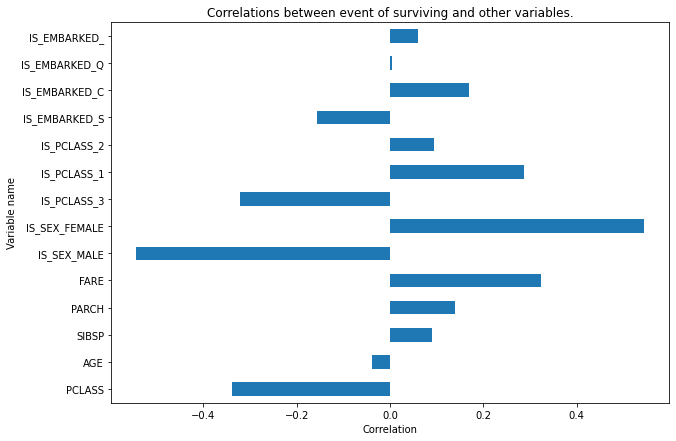

In [29]:
plot = corr_df.plot(kind='barh', 
                   title="Correlations between event of surviving and other variables.", 
                   legend=False, 
                   figsize=(10,7))
plot.set_xlabel("Correlation"); plot.set_ylabel("Variable name");

# 3. Questions and investigation

It is well know fact, that correlation does not imply causation, though it is a good starting point for further investigation. 

In this report I investigated relations between surviving and passenger sex, passenger class and age. In other words, **further analysis is about what factors contributed to survivability**.

Question which I tried to address are:
- *Were women more likely to survive?*
- *Were first/second class passengers more likely to survive than second/third class passengers?*
- *Were children prefered as passengers of lifeboats?*

To address first question, whether more women survived than men let’s look in the numbers. 

### Number of survived males and females vs. overall numbers

Table below depicts number of survivors divided by sex.

From given dataset we see, that more women (by percent) survived. 74.2% women survived, while only 18.9% men. Also, one can learn, that male survivors seemed to be slightly younger in average than females. 

It looks like, indeed, men were in much worse situation during Titanic evacuation.


In [30]:
info_males_females_df = pd.DataFrame(
        index = ['male','female'],
        data = {
        'number of survivors' : [no_males_survived, no_females_survived],
        'chance of surviving' : [no_males_survived/float(no_males), no_females_survived/float(no_females)],
        'number of passengers' : [no_males, no_females],
        'mean age of survivors' : [males_survived_df['AGE'].mean(), females_survived_df['AGE'].mean()]
    })

In [31]:
info_males_females_df

,number of survivors,chance of surviving,number of passengers,mean age of survivors
male,109,0.188908,577,27.631705
female,233,0.742038,314,28.979263


### Number of survived split by PCLASS

Let’s explore enother feature. Did the class play any role in surviving Titanic’s crash? 

In Table below we see results. Additionaly mean chance of surviving was depicted on the Plot.


In [32]:
titanic_classes_groupby = titanic_df.groupby(['PCLASS'])
info_classes_df = titanic_classes_groupby.mean()[['AGE','FARE','SURVIVED']]

info_classes_df.columns = ['mean age','mean fare', 'mean chance of surviving']
info_classes_df

,mean age,mean fare,mean chance of surviving
PCLASS,,,
1,37.048118,84.154687,0.629630
2,29.866958,20.662183,0.472826
3,26.403259,13.675550,0.242363


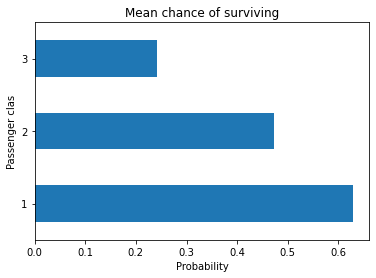

In [33]:
plot = info_classes_df['mean chance of surviving'].plot(kind='barh', title="Mean chance of surviving")
plot.set_xlabel("Probability")
plot.set_ylabel("Passenger clas");

Looking at above data, it’s visible that (in given dataset) 62.9% of 1st class passengers survived, 47.3% of 2nd class and only 24.2% of 3rd class passengers. Additionally we can see that passengers of 1st and 2nd class in average were older, and paid more for tickets.


### Survivors divided by SEX and PCLASS

Let’s combine those two features, sex and passenger and see, how it does look together. Table and Plot below contain information about survivors, divide by sex and class.


In [34]:
titanic_classes_sex_groupby = titanic_df.groupby(['SEX','PCLASS'])
titanic_classes_sex_means = titanic_classes_sex_groupby.mean()[['SURVIVED','AGE']]

titanic_classes_sex_means.columns = ['mean chance of surviving','mean age']

# group by SEX and PCLASS, but only survivors
titanic_survived_classes_sex_groupby = titanic_df.groupby(['SURVIVED']).get_group(True).groupby(['SEX','PCLASS'])
titanic_survived_classes_sex_means = titanic_survived_classes_sex_groupby.mean()[['AGE']]
titanic_survived_classes_sex_means.columns = ['mean age of survivors']

In [35]:
#merge two DataFrames
titanic_survived_classes_sex_means.merge(titanic_classes_sex_means, on=None, left_index=True, right_index=True)

mean age of survivors  mean chance of surviving   mean age
SEX    PCLASS                                                            
female 1                   34.420792                  0.968085  34.141405
       2                   28.127118                  0.921053  28.748661
       3                   22.930249                  0.500000  24.068493
male   1                   35.520346                  0.368852  39.287717
       2                   17.631073                  0.157407  30.653908
       3                   23.696001                  0.135447  27.372153

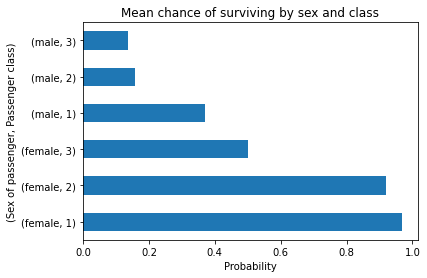

In [36]:
plot = titanic_classes_sex_means['mean chance of surviving'].plot(kind='barh')
plot.set_title("Mean chance of surviving by sex and class")
plot.set_xlabel("Probability")
plot.set_ylabel("(Sex of passenger, Passenger class)");

It looks, like women were far more likely to survive than men. Even females from 3rd class in given dataset survived in 50% cases. From Table above we can learn, that (with one exception for females in 1st class) survivors were in average younger.

Also, it seems that with higher class went higher chance of survival.

### Survivors among children

Last question, addressed the situation of children. For purpose of this investigation it was assumed that children are male or females below 16. Tables below present the data about survival rate of children on Titanic.

In [37]:
#let's assume the child is male or female younger than 16
children_df = titanic_df[titanic_df['AGE'] <= 15]
children_survived_df = children_df[children_df['SURVIVED'] == True]
no_children = len(children_df)
no_children_survived = len(children_survived_df)

describe_df2 = pd.DataFrame(
        index = ['children'],
        data = {
        'survived' : [no_children_survived],
        '% survived' : [no_children_survived/float(no_children)],
        '% survived (of all survivors)' : [no_children_survived/float(pax_survived)],
        'overall' : [no_children],
        '% of all passengers': [no_children/float(pax_overall)]
    })

In [38]:
describe_df2

,survived,% survived,% survived (of all survivors),overall,% of all passengers
children,49,0.590361,0.143275,83,0.093154


In [39]:
children_class_df = children_df.groupby(['PCLASS']).mean()[['SURVIVED']]
children_class_df.columns = ['mean chance of surviving']
children_class_df

,mean chance of surviving
PCLASS,
1,0.833333
2,1.000000
3,0.431034


# 4. Findings and statistically significant results

All above results were just simple depiction of data from given dataset. To infer some knowledge about general population, one has to state a null hypothesis and a alternative hypothesis. The statistical tests have to be performed to reject (or fail to reject) the null.

Coming back to stated questions, several null hypotheses were created.
- *Survivors were in average the same age as those who died in Titanic disaster.*
- *Men who survived were in average the same age as those who died.*
- *Females who survived in average were the same age as those who died.*
- *Average chance of surviving does not depend on whether passenger was a man or woman in different class.*

First three could be checked using independent T-test. But, before that, it has to be checked if given dataset meets requirements for using this test.

### Investigating the influence of age on surival rate
Histograms of ages of survivors and deceased. 
In histrogram big 'peak' is located around 30-years of age. It is located there because mean value of age was used to fill NaN values (AGE was missing in 177 records). The ~30 bin is overrepresented. This would definitely introduce bias in any statistical testing.

In [40]:
#histogram of age of survivors
survivors_ages = titanic_df.groupby('SURVIVED').get_group(True)['AGE']
survivors_ages.index = list(range(len(survivors_ages)))
survivors_ages.describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: AGE, dtype: float64

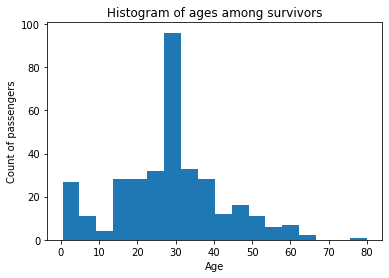

In [41]:
plt.hist(survivors_ages, bins=18, histtype='bar', label='Ages')
plt.title('Histogram of ages among survivors')
plt.xlabel('Age')
plt.ylabel('Count of passengers');

In [42]:
#histogram of age of ones who died
dead_ages = titanic_df.groupby('SURVIVED').get_group(False)['AGE']
dead_ages.index = list(range(len(dead_ages)))
dead_ages.describe()

count    549.000000
mean      30.415100
std       12.457370
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: AGE, dtype: float64

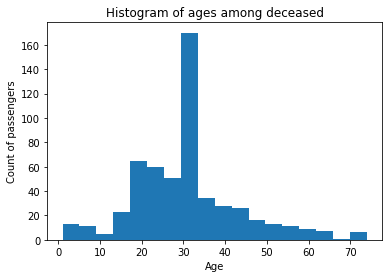

In [43]:
plt.hist(dead_ages, bins=18, histtype='bar')
plt.title('Histogram of ages among deceased')
plt.xlabel('Age')
plt.ylabel('Count of passengers');

Above plots show, that the age distribution is not normal. That's why T-test could not be used. That's why, 3 first null hypothesis will remain without any statisitcal proof. 

### Statistical tests

Nevertheless, the last null hypothesis, which is:
    
*"Average chance of surviving does not depend on whether passenger was a man or woman in different class."*

still could be tested.
We have 6 *conditions*:
 - female, 1st class;
 - female, 2st class;
 - female, 3st class;
 - male, 1st class;
 - male, 2st class;
 - male, 3st class;
 
and our dependent sample is *survivality (number of survivors)*.

We can create a contingency table of the frequencies and apply a Chi-Squared Test. A Chi-Squared test compares the observed values for each cell of a contingency table to the expected values for each cell and returns a test result from which a p-value of significance can be derived. 

Such procedure was conducted for testing stated null hypothesis. Assumed alfa level is 5%. 


In [44]:
titanic_classes_sex_groupby = titanic_df.groupby(['SEX','PCLASS'], as_index=False)

titanic_count = titanic_classes_sex_groupby.count()[['SURVIVED']]
titanic_survived_count = titanic_classes_sex_groupby.sum()[['SURVIVED']]
titanic_died_count = titanic_classes_sex_groupby.count()[['SURVIVED']] - titanic_classes_sex_groupby.sum()[['SURVIVED']]
titanic_survived_count = titanic_survived_count.merge(titanic_count, on=None, left_index=True, right_index=True)
contingency_df = titanic_died_count.merge(titanic_survived_count, on=None, left_index=True, right_index=True)
contingency_df.index = ['female 1st class','female 2st class','female 3st class', 'male 1st class','male 2st class','male 3st class']
contingency_df.columns = ['DIED', 'SURVIVED', 'column total']
contingency_df = contingency_df.transpose()
contingency_df['row total'] = contingency_df.sum(axis=1)

In [45]:
contingency_df

,female 1st class,female 2st class,female 3st class,male 1st class,male 2st class,male 3st class,row total
DIED,3,6,72,77,91,300,549
SURVIVED,91,70,72,45,17,47,342
column total,94,76,144,122,108,347,891


In [46]:
counts = [ contingency_df.loc['DIED'][:-1], contingency_df.loc['SURVIVED'][:-1] ]
chi2, p, ddof, expected = chi2_contingency( counts )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 350.67530839575556
p-value: 1.2523073473573166e-73
Degrees of Freedom: 5

[[ 57.91919192  46.82828283  88.72727273  75.17171717  66.54545455
  213.80808081]
 [ 36.08080808  29.17171717  55.27272727  46.82828283  41.45454545
  133.19191919]]


Looking at the result, we can see that *p-value* is few magnitudes smaller than our alfa level. Therefore, the null hypothesis is rejected. This allows us to conclude, that **survivability was not independent from passenger sex and class**. 

### Limitations of the analysis

Although above insigths and conclusions which were drawn from the analysis are true, the analysis itself has always some limitations.

In this case the essential factors, which constitute the limitations are:
- in the analysis the limited dataset was used. Dataset contains data for 891 of the total number of 2224 passengers. Additionally the dataset contains the NaN values. No matter what way was chosen to handle this (imputing, ommiting etc.) it always introduce some bias in the result of such analysis;
- data exploration relies on the statistical calculations, without (one exception) statistical tests. Such conclusions give the insight into data, but are only a glimpse. What one can learn looking only on statistical values like means, medians, deviations et.c (calculated for sample of full data) without testing it, are only intuitions, which might not be necessarily true for the full dataset (general population);
- it is always possible, that some other variables or conditions were important for survivability of the passengers. For example, the location of the cabin (distance to the nearest lifeboat) might play crucial role in surviving.

# 5. Conclusion of EDA

Looking on the given dataset, which is part of information about all passengers of Titanic, we can learn and gain some intuition about passengers, about their chances to survive. Using statistical tools, one can also infer knowledge about general population what was done in chapter 4 of this report.

For further investigation, it would be good to anwser questions like:
- *If passenger had relatives on board, was he/she more likely to survive?*
- *Were passengers who traveled with the same ticket number more/less likely to survive?*
- *Did the cabin position play any role regarding survivability?*

In this report, the basic exploration of dataset was conducted and I looked deeper into the variables which were highly corelated with survival rate.

Summarizing, the passenger class and sex played role. Higher class passngers and females, had better chance to survive this tragic event. Additionally, it looks like younger peopled were prefered on lifeboats. 

So, indeed, it was *“ladies and children first”* rule.



# 6. Creating predicting model
## Decision Trees



In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


dtree = DecisionTreeClassifier(max_depth=3)


X = pd.DataFrame(titanic_df.drop(['SURVIVED', 'PASSENGERID', 'TICKET', 'PCLASS', 'SEX', 'NAME', 'CABIN', 'EMBARKED'], axis=1))
y = pd.DataFrame(titanic_df.SURVIVED)

dtree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [48]:
#df2vis = pd.DataFrame(pd.concat([X, y], axis=1))

#sns.pairplot(df2vis, hue='SURVIVED')
#plt.show()
X.head()

,AGE,SIBSP,PARCH,FARE,IS_SEX_MALE,IS_SEX_FEMALE,IS_PCLASS_3,IS_PCLASS_1,IS_PCLASS_2,IS_EMBARKED_S,IS_EMBARKED_C,IS_EMBARKED_Q,IS_EMBARKED_
0,22.0,1,0,7.2500,True,False,True,False,False,True,False,False,False
1,38.0,1,0,71.2833,False,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,False,True,True,False,False,True,False,False,False
3,35.0,1,0,53.1000,False,True,False,True,False,True,False,False,False
4,35.0,0,0,8.0500,True,False,True,False,False,True,False,False,False


## Visualization of Decision Tree

In [49]:
# from sklearn.externals.six import StringIO  #Old ver
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
X.head()

## Checking performance of the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = dtree.predict(X)

print(classification_report(y, y_pred))

In [ ]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived']);

## Logistic Regression model with ROC curve plot

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

estimator = LogisticRegression()
estimator.fit(X, y)

y_scores = estimator.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores, pos_label=True)

#roc_auc = roc_auc_score(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, alpha=1, label='ROC (AUC = %0.2f)' % (roc_auc), 
         color='black', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8);



## ROC plots for CrossValidatation

In [ ]:
# based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_plots(ClassifierObj, X, y):
    cv = StratifiedKFold(n_splits=6)
    classifier = ClassifierObj

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10,7))

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
roc_plots(LogisticRegression(penalty = 'l1', C=0.1), X, y.SURVIVED)

## Feature Selection - using Chi2 to select k best features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)

X.shape, X_new.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


roc_plots(LogisticRegression(), pd.DataFrame(X_new), y.SURVIVED)

## Feature selection - recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE, RFECV

selector = RFECV(RandomForestClassifier())

selector.fit(X, y.SURVIVED)

columns = list(X.columns[selector.support_])
print(columns)

selector.ranking_

## Looking for the best hyper-parameters - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

params = {'C': [0.1,0.4,1], 'penalty': ['l1', 'l2']}

clf = GridSearchCV(classifier, params)
clf.fit(X, y.SURVIVED)


clf.best_params_

## Creating pipeline for all steps of the processing and modelling

In [ ]:
#pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('reduce_dim', SelectKBest(chi2, k=10)),
    ('classify', LogisticRegression(C=0.1))
])

pipe.fit(X, y.SURVIVED)

X_new = pipe.named_steps['reduce_dim'].transform(X)

pipe.named_steps['classify'].score(X_new, y)

In [ ]:
LogisticRegression(C=0.1).fit(X_new, y.SURVIVED).score(X_new, y.SURVIVED)

## Using GridSearchCV in pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import numpy as np

pipe = Pipeline([
    ('preprocessing', MinMaxScaler()),
    ('reduce_dim', SelectKBest(chi2)),
    ('classify', LogisticRegression(C=0.1))
])

params = {
        'reduce_dim__k': np.arange(1,10,1),
        'classify__C': [0.05, 0.1, 0.2, 0.5, 1, 2],
        'classify__penalty': ['l1', 'l2']
}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=params)
grid.fit(X, y.SURVIVED)

grid.best_estimator_

## Score metric for the best found parameters

In [ ]:
grid.score(X, y.SURVIVED)

## GridSearchCV with pipeline and different dimensionality reduction functions

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, NMF


pipe = Pipeline([
    ('reduce_dim', None),
    ('classify', LogisticRegression(C=0.1))
])

params = [{
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': np.arange(1,10,1),
        'classify__C': [0.05, 0.1, 0.2, 0.5, 1, 2],
        'classify__penalty': ['l1', 'l2']
    },
    {
        'reduce_dim': [PCA(), NMF()],
        'reduce_dim__n_components': [2,4,8,9],
        'classify__C': [0.05, 0.1, 0.2, 0.5, 1, 2],
        'classify__penalty': ['l1', 'l2']
    }
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=params)
grid.fit(X, y.SURVIVED)

grid.best_estimator_

### Links:

1. http://www.anesi.com/titanic.htm - “The Titanic Casualty Figures (and what they mean)”
2. https://www.bsfrey.ch/articles/C_524_Who_Perished_on_the_Titanic_Rationality_and_Society.pdf - “Who perished on the Titanic? The importance of social norms” by B.S. Frey, D. A. Savage, B. Torgler - Rationality and Society, February 2011 vol. 23 no. 1 pp. 35-49
3. http://cs229.stanford.edu/proj2012/LamTang-TitanicMachineLearningFromDisaster.pdf - “CS229 Titanic - Machine Learning From Disaster” by E. Lam, C. Tang, 2012


